In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import portfolio_insurance as pi
import requests
import json
import time
import pickle

In [13]:
model_names = ['BH_75', 'BH_70', 'BH_65', 'BH_60', 'BH_55', 'BH_50', 'SL_100', 'SP_100', 'CPPI_100_70', 'TIPP_100_70'] # main table


df =  pd.read_csv('./data/snp2.csv')
rf = df['RF'].mean() * 12
upper_years = [35]

In [14]:
p_val = np.load('./result/main_table/p_val_0.05.npy', allow_pickle=True)
w_val = np.load('./result/main_table/w_val_0.05.npy', allow_pickle=True)

p_val = p_val.reshape(1)
p_val = p_val[0]

w_val = w_val.reshape(1)
w_val = w_val[0]

In [15]:
bear_year = np.load('./result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]


In [16]:
res_final = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    res_final[item] = [pd.Series(i[1]) for i in list(p_val[items].items())]


In [17]:
E, res, ret_sim, ret_sim_y = {}, {}, {}, {}

log_u = {}
quad = {}
power = {}
exp = {}
MPV_1 = {}
MPV_225 = {}
CPV = {}

for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    ret_sim[item], ret_sim_y[item] = [], []

In [18]:
for k in range(len(bear_year[35][0])):    
    for items in list(p_val.keys()):
        
        item = items.split('_')[0] + '_' + items.split('_')[1]
#         print(items)
        res[item] = res_final[item][k]
#         ret_sim_y[item].append((res[item].iloc[-1] - res[item].iloc[0])/res[item].iloc[0])
        
        ret_m = (res[item] - res[item].shift(1)) / (res[item].shift(1)+0.0000000000000001)
        ret_m = ret_m.iloc[1:]
        ret_sim_y[item].extend(list(ret_m))
        

In [19]:
# quad, b
bs = np.arange(10,51)/100
# bs = np.arange(30,50)/100
quad_u_dict = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    quad_u_dict[item] = []
    
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    for b in bs:
        quad_u_dict[item].append(pi.power_u(np.array(ret_sim_y[item]),b))

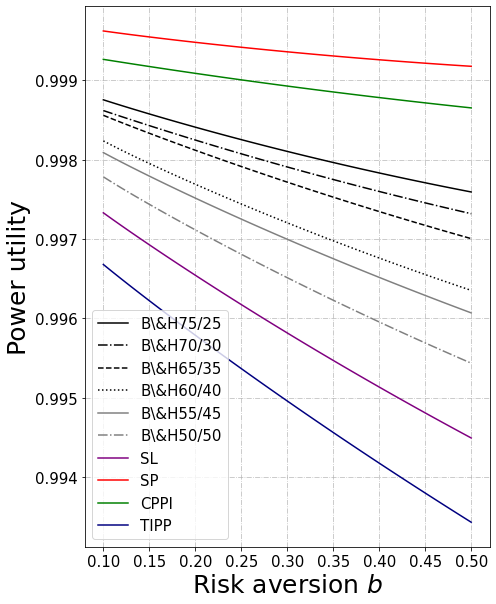

In [9]:
plt.figure(figsize=(7, 8.5))
plt.plot(bs, np.array(quad_u_dict['BH_75']), label="B\&H75/25", color='black',linestyle='-')
plt.plot(bs, np.array(quad_u_dict['BH_70']), label="B\&H70/30", color='black',linestyle='-.')
plt.plot(bs, np.array(quad_u_dict['BH_65']), label="B\&H65/35", color='black',linestyle='--')
plt.plot(bs, np.array(quad_u_dict['BH_60']), label="B\&H60/40", color='black',linestyle=':')
plt.plot(bs, np.array(quad_u_dict['BH_55']), label="B\&H55/45", color='grey',linestyle='-')
plt.plot(bs, np.array(quad_u_dict['BH_50']), label="B\&H50/50", color='grey',linestyle='-.')
plt.plot(bs, np.array(quad_u_dict['SL_100']), label="SL".format(item), color='purple',linestyle='-')
plt.plot(bs, np.array(quad_u_dict['SP_100']), label="SP".format(item), color='red',linestyle='-')
plt.plot(bs, np.array(quad_u_dict['CPPI_100']), label="CPPI".format(item), color='green',linestyle='-')
plt.plot(bs, np.array(quad_u_dict['TIPP_100']), label="TIPP".format(item), color='navy',linestyle='-')
plt.xlabel('Risk aversion $b$', size=25)
plt.ylabel('Power utility', size=25)
# plt.axvline(x=0.089, ymin=0, ymax=1, color="blue", linestyle="--")
plt.legend(fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

plt.grid(alpha=0.8, linestyle='-.')
plt.tight_layout()
plt.savefig('./power.pdf', dpi=300)
plt.show()




# exp

In [10]:


# exp, b

bs = np.arange(50,100)/10
# bs = np.arange(30,31,0.1)/100
# bs = np.arange(50,51,0.1)/100
# bs = np.arange(70,71,0.1)/100
exp_u_dict = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    exp_u_dict[item] = []
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    for b in bs:
        exp_u_dict[item].append(pi.exp_u(np.array(ret_sim_y[item]), b))

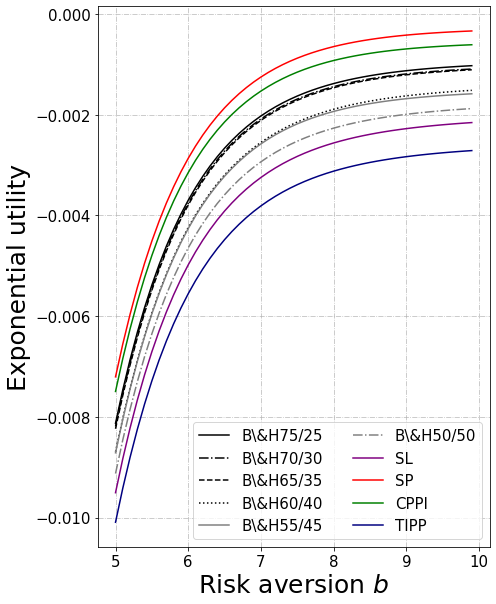

In [11]:

plt.figure(figsize=(7, 8.5))
plt.plot(bs, np.array(exp_u_dict['BH_75']), label="B\&H75/25", color='black',linestyle='-')
plt.plot(bs, np.array(exp_u_dict['BH_70']), label="B\&H70/30", color='black',linestyle='-.')
plt.plot(bs, np.array(exp_u_dict['BH_65']), label="B\&H65/35", color='black',linestyle='--')
plt.plot(bs, np.array(exp_u_dict['BH_60']), label="B\&H60/40", color='black',linestyle=':')
plt.plot(bs, np.array(exp_u_dict['BH_55']), label="B\&H55/45", color='grey',linestyle='-')
plt.plot(bs, np.array(exp_u_dict['BH_50']), label="B\&H50/50", color='grey',linestyle='-.')
plt.plot(bs, np.array(exp_u_dict['SL_100']), label="SL".format(item), color='purple',linestyle='-')
plt.plot(bs, np.array(exp_u_dict['SP_100']), label="SP".format(item), color='red',linestyle='-')
plt.plot(bs, np.array(exp_u_dict['CPPI_100']), label="CPPI".format(item), color='green',linestyle='-')
plt.plot(bs, np.array(exp_u_dict['TIPP_100']), label="TIPP".format(item), color='navy',linestyle='-')

plt.xlabel('Risk aversion $b$', size=25)
plt.ylabel('Exponential utility', size=25)
plt.legend(loc='lower right', fontsize=15, ncol=2)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
# plt.ylim(-0.002,-0.001)
# plt.xlim(6.2,6.5)

plt.grid(alpha=0.8, linestyle='-.')
plt.tight_layout()
# plt.axvline(x=1.61, ymin=0, ymax=1, color="blue", linestyle="--")
plt.savefig('./exp.pdf', dpi=300)
plt.show()

In [ ]:
# risk-averse 할수록 PI 를 선호한다.

# MPV alpha 1.0

In [40]:
# MPV 1.0, alpha
bs = np.arange(10/5,150/5)/20
MPV_alpha_dict = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    MPV_alpha_dict[item] = []
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    print(len(ret_sim_y[item]))
    x = list(ret_sim_y[item])
    
    p = [1/len(x)]*len(x)
    x_sorted, p_sorted = pi.get_pairs(x,p)
    pis=pi.get_pis(x_sorted, p_sorted)
    for b in bs:
        
        MPV_alpha_dict[item].append(pi.MPV(x_sorted, pis, alpha=b, beta=b, lambda_=1.0))

9240
9240
9240
9240
9240
9240
9240
9240
9240
9240


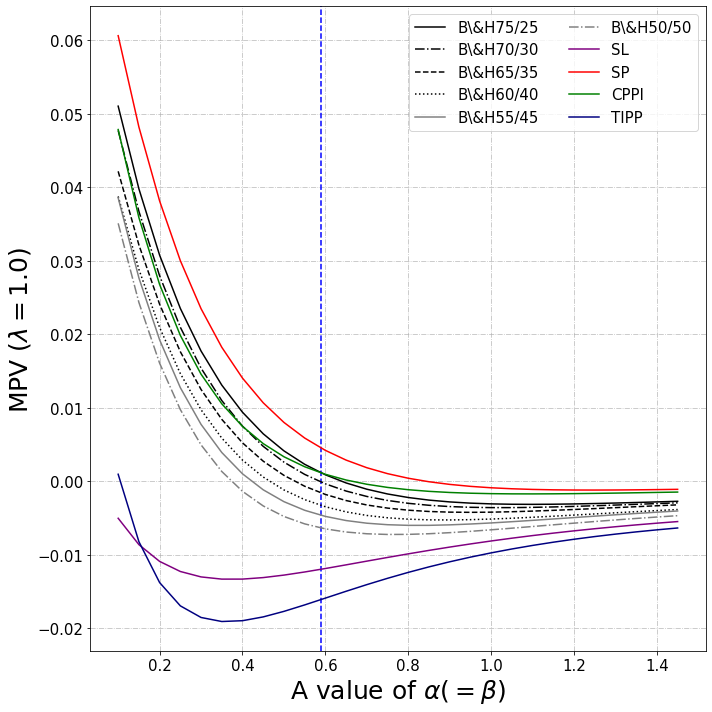

In [45]:
plt.figure(figsize=(10, 10))
plt.grid(True)
# plt.axvline(x=0.375, ymin=0, ymax=1, color="blue", linestyle="--")
# plt.axvline(x=0.17, ymin=0, ymax=1, color="green", linestyle="--")
# plt.axvline(x=0.0325, ymin=0, ymax=1, color="black", linestyle="-")
plt.axvline(x=0.59, ymin=0, ymax=1, color="blue", linestyle="--")


plt.plot(bs, np.array(MPV_alpha_dict['BH_75']), label="B\&H75/25", color='black',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['BH_70']), label="B\&H70/30", color='black',linestyle='-.')
plt.plot(bs, np.array(MPV_alpha_dict['BH_65']), label="B\&H65/35", color='black',linestyle='--')
plt.plot(bs, np.array(MPV_alpha_dict['BH_60']), label="B\&H60/40", color='black',linestyle=':')
plt.plot(bs, np.array(MPV_alpha_dict['BH_55']), label="B\&H55/45", color='grey',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['BH_50']), label="B\&H50/50", color='grey',linestyle='-.')
plt.plot(bs, np.array(MPV_alpha_dict['SL_100']), label="SL".format(item), color='purple',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['SP_100']), label="SP".format(item), color='red',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['CPPI_100']), label="CPPI".format(item), color='green',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['TIPP_100']), label="TIPP".format(item), color='navy',linestyle='-')

plt.xlabel('A value of $\\alpha(=\\beta)$', size=25)
plt.ylabel('MPV ($\lambda=$1.0)', size=25)
plt.legend(loc="upper right", fontsize=15, ncol=2)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

plt.grid(alpha=0.8, linestyle='-.')
plt.tight_layout()
plt.savefig('./MPV_alpha_1.pdf', dpi=300)
plt.show()

# MPV alpha 2.25

In [61]:
# MPV 2.25, alpha
bs = np.arange(40/5,200/5)/20
MPV_alpha_dict = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    MPV_alpha_dict[item] = []
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    print(item)
    x = list(ret_sim_y[item])
    p = [1/len(x)]*len(x)
    x_sorted, p_sorted = pi.get_pairs(x,p)
    pis=pi.get_pis(x_sorted, p_sorted)
    for b in bs:
        MPV_alpha_dict[item].append(pi.MPV(x_sorted, pis, alpha=b, beta=b, lambda_=2.25))

BH_75
BH_70
BH_65
BH_60
BH_55
BH_50
SL_100
SP_100
CPPI_100
TIPP_100


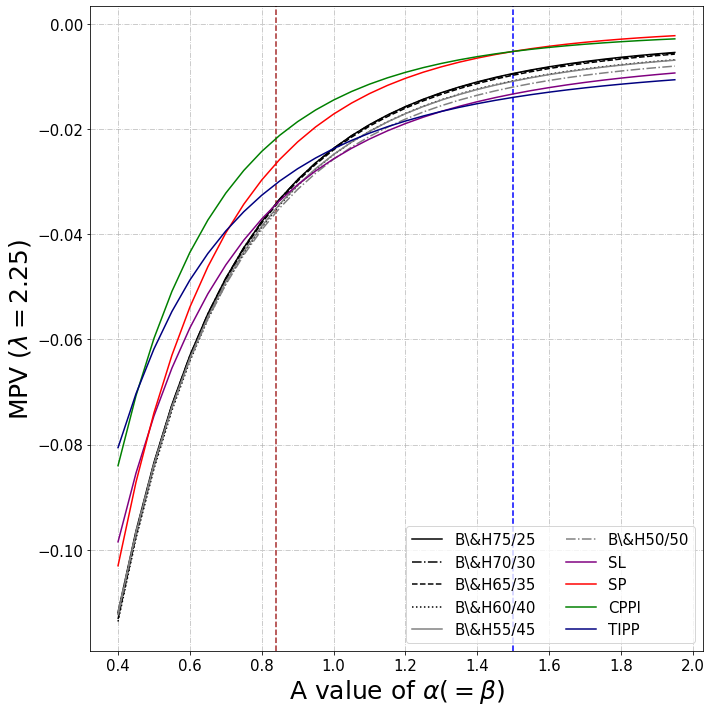

In [65]:
plt.figure(figsize=(10, 10))
plt.grid(True)
# plt.axvline(x=0.375, ymin=0, ymax=1, color="black", linestyle="--")
# plt.axvline(x=0.17, ymin=0, ymax=1, color="black", linestyle="-")
# plt.axvline(x=0.0325, ymin=0, ymax=1, color="green", linestyle="--")
plt.axvline(x=1.5, ymin=0, ymax=1, color="blue", linestyle="--")
plt.axvline(x=0.84, ymin=0, ymax=1, color="brown", linestyle="--")

plt.plot(bs, np.array(MPV_alpha_dict['BH_75']), label="B\&H75/25", color='black',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['BH_70']), label="B\&H70/30", color='black',linestyle='-.')
plt.plot(bs, np.array(MPV_alpha_dict['BH_65']), label="B\&H65/35", color='black',linestyle='--')
plt.plot(bs, np.array(MPV_alpha_dict['BH_60']), label="B\&H60/40", color='black',linestyle=':')
plt.plot(bs, np.array(MPV_alpha_dict['BH_55']), label="B\&H55/45", color='grey',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['BH_50']), label="B\&H50/50", color='grey',linestyle='-.')
plt.plot(bs, np.array(MPV_alpha_dict['SL_100']), label="SL".format(item), color='purple',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['SP_100']), label="SP".format(item), color='red',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['CPPI_100']), label="CPPI".format(item), color='green',linestyle='-')
plt.plot(bs, np.array(MPV_alpha_dict['TIPP_100']), label="TIPP".format(item), color='navy',linestyle='-')

plt.grid(alpha=0.8, linestyle='-.')
plt.xlabel('A value of $\\alpha(=\\beta)$', size=25)
plt.ylabel('MPV ($\lambda=$2.25)', size=25)
plt.legend(loc="lower right", fontsize=15, ncol=2)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.tight_layout()
plt.savefig('./MPV_alpha_225.pdf', dpi=300)
plt.show()

In [53]:
# MPV 2.25, alpha
bs = np.arange(0,50/5)/20
MPV_alpha_dict = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    MPV_alpha_dict[item] = []
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    x = list(ret_sim_y[item])
    p = [1/len(x)]*len(x)
    x_sorted, p_sorted = pi.get_pairs(x,p)
    pis=pi.get_pis(x_sorted, p_sorted)
    for b in bs:
        MPV_alpha_dict[item].append(pi.MPV(x_sorted, pis, alpha=b, beta=b, lambda_=2.25))

In [ ]:
# risk-averse 할수록 BH 를 선호한다.

# MPV 0.88 lambda

In [20]:

bs = np.arange(1.0,3.5,0.1) #(5,35)
MPV_lambda_dict = {}
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    MPV_lambda_dict[item] = []
for items in list(p_val.keys()):
    item = items.split('_')[0] + '_' + items.split('_')[1]
    x = list(ret_sim_y[item])
    p = [1/len(x)]*len(x)
    x_sorted, p_sorted = pi.get_pairs(x,p)
    pis=pi.get_pis(x_sorted, p_sorted)
    for b in bs:
        MPV_lambda_dict[item].append(pi.MPV(x_sorted, pis, alpha=0.88, beta=0.88, lambda_=b))

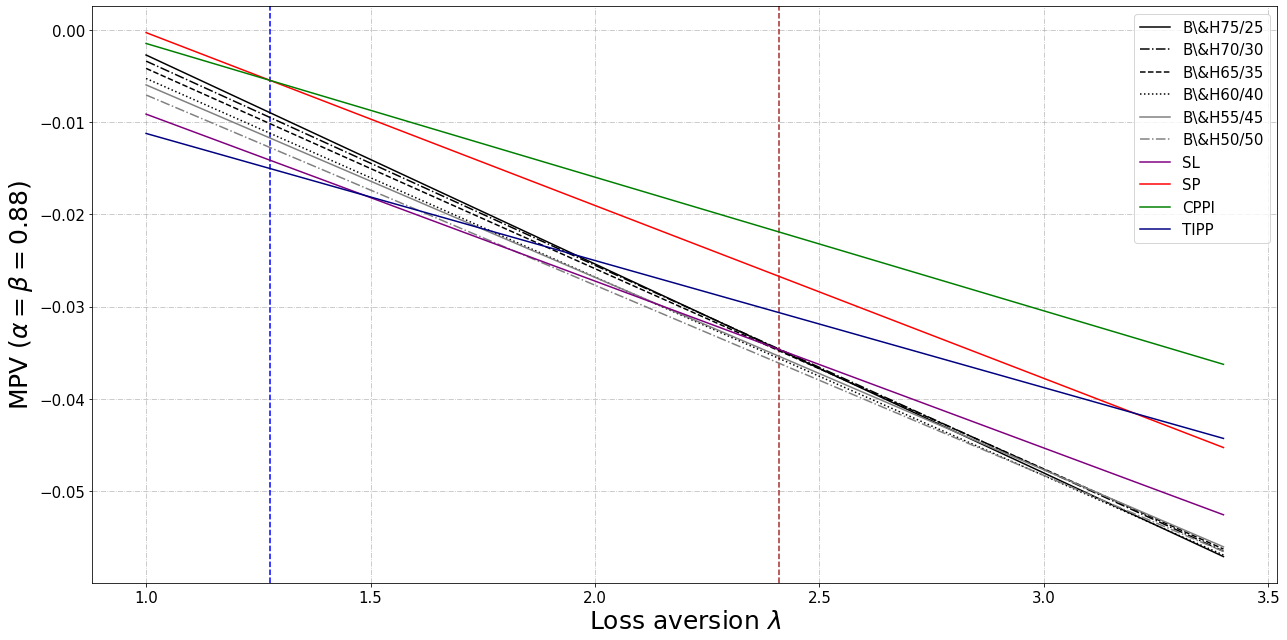

In [21]:
plt.figure(figsize=(18, 9))
plt.grid(True)
# plt.axvline(x=20, ymin=0, ymax=1, color="black", linestyle="--")
plt.axvline(x=1.275, ymin=0, ymax=1, color="blue", linestyle="--")
plt.axvline(x=2.41, ymin=0, ymax=1, color="brown", linestyle="--")


plt.plot(bs, np.array(MPV_lambda_dict['BH_75']), label="B\&H75/25", color='black',linestyle='-')
plt.plot(bs, np.array(MPV_lambda_dict['BH_70']), label="B\&H70/30", color='black',linestyle='-.')
plt.plot(bs, np.array(MPV_lambda_dict['BH_65']), label="B\&H65/35", color='black',linestyle='--')
plt.plot(bs, np.array(MPV_lambda_dict['BH_60']), label="B\&H60/40", color='black',linestyle=':')
plt.plot(bs, np.array(MPV_lambda_dict['BH_55']), label="B\&H55/45", color='grey',linestyle='-')
plt.plot(bs, np.array(MPV_lambda_dict['BH_50']), label="B\&H50/50", color='grey',linestyle='-.')
plt.plot(bs, np.array(MPV_lambda_dict['SL_100']), label="SL".format(item), color='purple',linestyle='-')
plt.plot(bs, np.array(MPV_lambda_dict['SP_100']), label="SP".format(item), color='red',linestyle='-')
plt.plot(bs, np.array(MPV_lambda_dict['CPPI_100']), label="CPPI".format(item), color='green',linestyle='-')
plt.plot(bs, np.array(MPV_lambda_dict['TIPP_100']), label="TIPP".format(item), color='navy',linestyle='-')

plt.grid(alpha=0.8, linestyle='-.')
plt.xlabel('Loss aversion $\lambda$', size=25)
plt.ylabel('MPV ($\\alpha = \\beta = 0.88$)', size=25)
plt.legend(fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.tight_layout()
plt.savefig('./MPV_lambda.pdf', dpi=300)
plt.show()